### Downloading Dataset

In [0]:
# !pip install kaggle

# !mkdir .kaggle

# import json
# token = {"username":"ivyclare","key":"86f0e659c102ab797c73851bbad8373e"}
# with open('/content/.kaggle/kaggle.json', 'w') as file:
#     json.dump(token, file)

# !chmod 600 /content/.kaggle/kaggle.json

# !cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
 
 
# !kaggle config set -n path -v{/content}

# !kaggle datasets download -d shayanfazeli/heartbeat -p /content

# !unzip \*.zip

In [0]:
import math
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.externals import joblib


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout
from keras.utils import np_utils


Using TensorFlow backend.


In [0]:
### Load Dataset
train_dataframe = pd.read_csv("mitbih_train.csv", header=None)
test_dataframe = pd.read_csv("mitbih_test.csv", header=None)
dataframe = pd.concat([train_dataframe,test_dataframe], axis=0)

### Exploring Data


In [0]:

#Method For Data Exporation
def exploreData(dataframe):
    # Preview dataset
    print("Dataset Head")
    print(dataframe.head(3))
    print("--" * 50)
    
    # Features in dataset
    print("Dataset Atrributes")
    print(dataframe.columns.values)
    print("--" * 50)
    
     # view distribution of numerical features across the data set
    print("Dataset Numerical Features")
    print(dataframe.describe())
    print("--" * 50)
    
    # View How many samples and how many missing values for each feature
    print("Dataset Features Details")
    print(dataframe.info())
    print("--" * 50)
    
    # view distribution of categorical features across the data set
#     print("Dataset Categorical Features")
#     print(dataframe.describe(include=['O']))
#     print("--" * 50)
        
    #Checking for missing values
    print("Check for Missing Values")
    print(dataframe.isnull().sum())
    print("--" * 50)
     #Get number of instances and number of attributes
    print("Number of Instances and Attributes")
    print(dataframe.shape)
    print("--" * 50)
    
exploreData(dataframe)
# Distribution of Output Variable
dataframe[187].value_counts()


Dataset Head
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   

        7         8         9   ...   178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  

[3 rows x 188 columns]
----------------------------------------------------------------------------------------------------
Dataset Atrributes
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  4

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

### Observations
- No missing values
- 109446 samples
- 188 attributes
- Dataset is unbalanced
Data was already filtered and beats extracted according to the paper **ECG Heartbeat Classification: A Deep Transferable
Representation**

In [0]:
X = dataframe.iloc[:,:187]
#print(X[100:110])
y = dataframe.iloc[:,187]
print(y[100:110])

100    0.0
101    0.0
102    0.0
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
108    0.0
109    0.0
Name: 187, dtype: float64


### Getting Data For Each Category


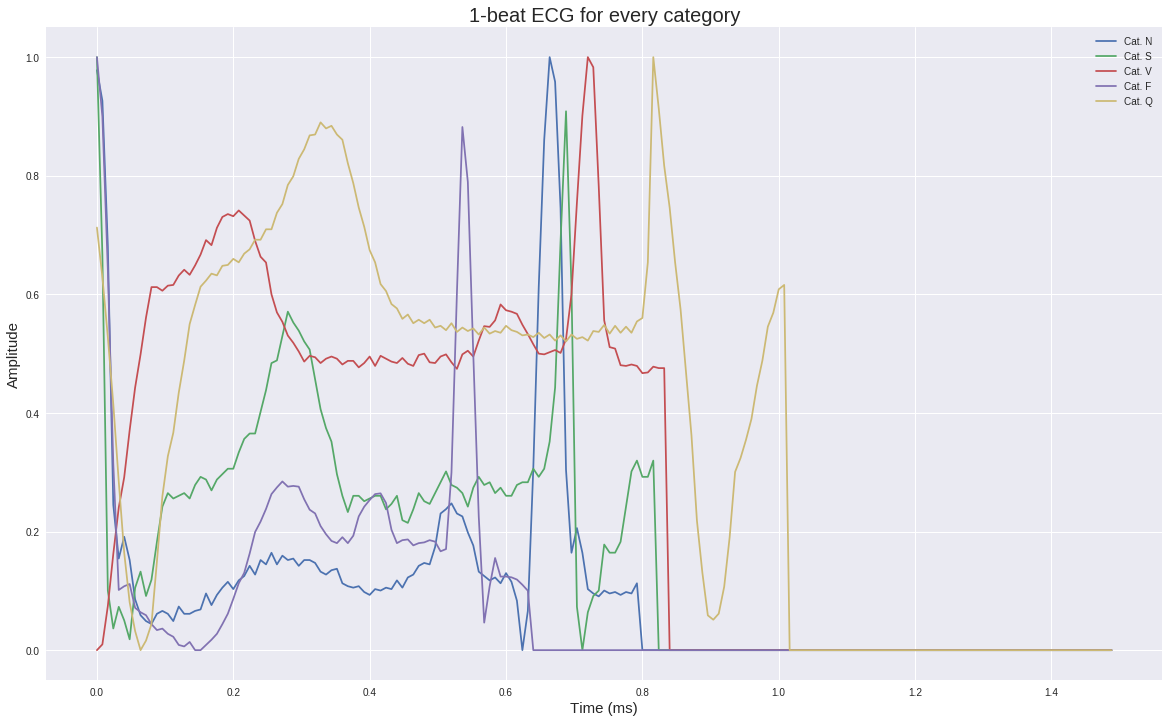

In [0]:
# Plotting one beat for each category
# Defining Categories

#Gets all Class 0 
C0 = dataframe[dataframe[187] == 0]
X0 = C0.iloc[:,:187]
y0 = C0.iloc[:,187]

#Gets all Class 1
C1 = dataframe[dataframe[187] == 1]
X1 = C1.iloc[:,:187]
y1 = C1.iloc[:,187]

#Gets all Class 2 
C2 = dataframe[dataframe[187] == 2]
X2 = C2.iloc[:,:187]
y2 = C2.iloc[:,187]

#Gets all Class 3
C3 = dataframe[dataframe[187] == 3]
X3 = C3.iloc[:,:187]
y3 = C3.iloc[:,187]

#Gets all Class 4 
C4 = dataframe[dataframe[187] == 4]
X4 = C4.iloc[:,:187]
y4 = C4.iloc[:,187]

x = np.arange(0, 187)*8/1000

# print(X0.shape)
# print(y0.shape)

# print(X1.shape)
# print(y1.shape)

#Plotting the First beat for each category
plt.figure(figsize=(20,12))
plt.plot(x, X0.iloc[0,:], label="Cat. N")
plt.plot(x, X1.iloc[0,:], label="Cat. S")
plt.plot(x, X2.iloc[0,:], label="Cat. V")
plt.plot(x, X3.iloc[0,:], label="Cat. F")
plt.plot(x, X4.iloc[0,:], label="Cat. Q")

plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()


### Oversampling Data (Balancing the data)

In [0]:
# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=0)

# X,y = os.fit_sample(X, y)
# X = pd.DataFrame(data=X,columns=dataframe.columns[:187] )
# y = pd.DataFrame(data=y.ravel(),columns=[187])


In [0]:
## we can Check the numbers of our data
#print("length of oversampled data is ",len(X))
#print("C0: ",len(y.values.ravel()[y[187].values.ravel()==0]))
#print("C1: ",len(y.values.ravel()[y[187].values.ravel()==1]))
#print("C2: ",len(y.values.ravel()[y[187].values.ravel()==2]))
#print("C3: ",len(y.values.ravel()[y[187].values.ravel()==3]))
#print("C4: ",len(y.values.ravel()[y[187].values.ravel()==4]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y.values.ravel()[os_data_y[187].values.ravel()==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y.values.ravel()[os_data_y[187].values.ravel()==1])/len(os_data_X))


### Splitting Data

In [0]:
## Splitting the data with selected features. Ratio 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 


### Feature Scaling or Normalizing

In [0]:
# sc = StandardScaler()
# X = sc.fit_transform(X)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Feature Extraction With XGBoost



In [0]:
# fit an a Random Forest model to the data
sel = SelectFromModel(XGBClassifier())
sel.fit(X_train, y_train)
#To see which features are important
sel.get_support()

#Using Extra Trees
# model = ExtraTreesClassifier()
# model.fit(X_train, y_train)
# # display the relative importance of each attribute
# print(model.feature_importances_)

# model = XGBClassifier()
# model.fit(X, y)
# # feature importance
# print(model.feature_importances_)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [0]:
#We can also check and plot the distribution of importance.
#pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

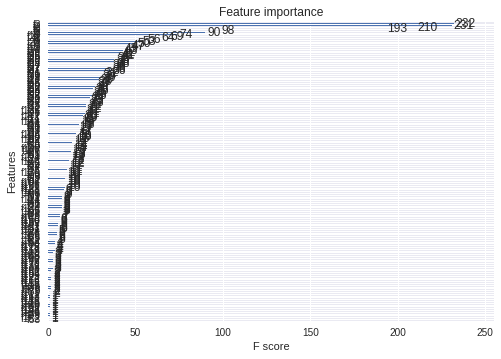

In [0]:
# plot feature importance
plot_importance(model)
plt.show()

In [0]:
X_important_train = sel.transform(X_train)
X_important_test = sel.transform(X_test)

### Implementing SVM

In [0]:
#svclassifier = svm.SVC(C=0.5, kernel='linear')  

# Create support vector classifier
#svclassifier = SVC(kernel='poly', class_weight='balanced', C=1.0, random_state=0)


In [0]:

##WORKING 
svclassifier = LinearSVC(class_weight='balanced', C=1.0, random_state=0, tol=1e-5)

n_estimators = 10
#svclassifier = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))


print("..................................Traning set................................")
svclassifier.fit(X_important_train, y_train)

print(svclassifier.predict(X_important_train))
score = svclassifier.score(X_important_train, y_train)
#print ("Training Set size = ", C)
print("Training Set accuracy = ", score*100)
print("Training Set error = ", (1-score)*100)



..................................Traning set................................


In [0]:

print("..................................Test set...................................")
#Get our result predictions 
y_pred = svclassifier.predict(X_important_test)
print(y_pred)
score = svclassifier.score(X_important_test, y_test)
#print("Test Set size = ",X.shape[0]-c)
print("Test Set accuracy = ", score*100)
print("Test Set error = ",(1-score)*100)


#Get our confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)
print(conf_mat)
print(class_report)

In [0]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(conf_mat,
                     index = ['0','1','2','3','4'], 
                     columns = ['0','1','2','3','4'])

plt.figure(figsize=(8.6,6))
sns.heatmap(cm_df, annot=True,fmt='g')
#plt.title('Arrythmias Prediction Confusion Matrx With SVM')
plt.title('BoostedTree-SVM Arrythmias Prediction Confusion Matrx\nAccuracy: %.2f%% (%.2f%%)' % (score*100, (1-score)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.figtext(1.30, 0.01, 'Accuracy: {}%\n Sensitivity: {}\n Specificity: [{} {} {}] '.format(round(accuracy, 2),sensitivity,round(specificity1, 2), round(specificity2, 2),round(specificity3, 2)), horizontalalignment='right')
plt.show()
